In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras import regularizers
# from google.colab import drive
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
filterwarnings("ignore")

In [3]:
# drive.mount('/content/drive')

In [6]:
data = pd.read_csv("datasets/depression_dataset_reddit_cleaned.csv")
data

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [7]:
X = data["clean_text"].values
y = data.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(X_train) 
 
kalimat_train = tokenizer.texts_to_sequences(X_train)
kalimat_test = tokenizer.texts_to_sequences(X_test)
 
pading_train = pad_sequences(kalimat_train) 
pading_test = pad_sequences(kalimat_test)
pading_test.shape

(1547, 1726)

In [9]:
# def buat_model():
#   model = Sequential([
#     layers.Embedding(input_dim=5000, output_dim=16),
#     layers.LSTM(64),
#     layers.Dropout(0.25),
#     layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     layers.Dropout(0.6),
#     layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     layers.Dropout(0.6),
#     layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     layers.Dropout(0.6),
#     layers.Dense(1, activation='sigmoid')
#   ])
#   model.compile(
#     loss="binary_crossentropy",
#     optimizer="adam",
#     metrics=["accuracy"]
#   )

#   return model

In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nAkurasi telah mencapai >95%!")
            self.model.stop_training = True
callbacks = myCallback()

In [8]:
# model = KerasClassifier(build_fn=buat_model)

In [9]:
# batch_size = [32, 64]
# epochs = [15]

# param_grid = {
#     "batch_size":batch_size, 
#     "epochs":epochs
# }

In [10]:
# grid_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_model.fit(pading_train, y_train, validation_data=(pading_test, y_test), verbose=2)


Epoch 1/15
129/129 - 25s - loss: 1.9143 - accuracy: 0.5005 - val_loss: 0.8161 - val_accuracy: 0.5197 - 25s/epoch - 193ms/step
Epoch 2/15
129/129 - 15s - loss: 0.7228 - accuracy: 0.5027 - val_loss: 0.6943 - val_accuracy: 0.5197 - 15s/epoch - 118ms/step
Epoch 3/15
129/129 - 16s - loss: 0.6936 - accuracy: 0.4879 - val_loss: 0.6931 - val_accuracy: 0.5197 - 16s/epoch - 127ms/step
Epoch 4/15
129/129 - 15s - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6930 - val_accuracy: 0.5197 - 15s/epoch - 119ms/step
Epoch 5/15
129/129 - 16s - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5197 - 16s/epoch - 127ms/step
Epoch 6/15
129/129 - 15s - loss: 0.6934 - accuracy: 0.4881 - val_loss: 0.6931 - val_accuracy: 0.5197 - 15s/epoch - 119ms/step
Epoch 7/15
129/129 - 16s - loss: 0.6933 - accuracy: 0.4934 - val_loss: 0.6932 - val_accuracy: 0.4803 - 16s/epoch - 122ms/step
Epoch 8/15
129/129 - 15s - loss: 0.6931 - accuracy: 0.5019 - val_loss: 0.6931 - val_accuracy: 0.5197 - 15s/epoch - 119

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fa48c26d810>,
             param_grid={'batch_size': [32, 64], 'epochs': [15]})

In [11]:
# print(grid_model.best_params_)

{'batch_size': 64, 'epochs': 15}


In [12]:
 model = Sequential([
    layers.Embedding(input_dim=5000, output_dim=16),
    layers.LSTM(64),
    layers.Dropout(0.25),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.6),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.6),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.6),
    layers.Dense(1, activation='sigmoid')
  ])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
  )

In [13]:
history = model.fit(pading_train, y_train, validation_data=(pading_test, y_test), callbacks=[callbacks],
          batch_size=64 , epochs=15 , verbose=2)

Epoch 1/15
97/97 - 156s - loss: 2.1654 - accuracy: 0.7050 - val_loss: 0.7414 - val_accuracy: 0.8772 - 156s/epoch - 2s/step
Epoch 2/15
97/97 - 161s - loss: 0.4227 - accuracy: 0.9216 - val_loss: 0.2345 - val_accuracy: 0.9528 - 161s/epoch - 2s/step
Epoch 3/15

Akurasi telah mencapai >95%!
97/97 - 164s - loss: 0.1743 - accuracy: 0.9749 - val_loss: 0.1647 - val_accuracy: 0.9677 - 164s/epoch - 2s/step


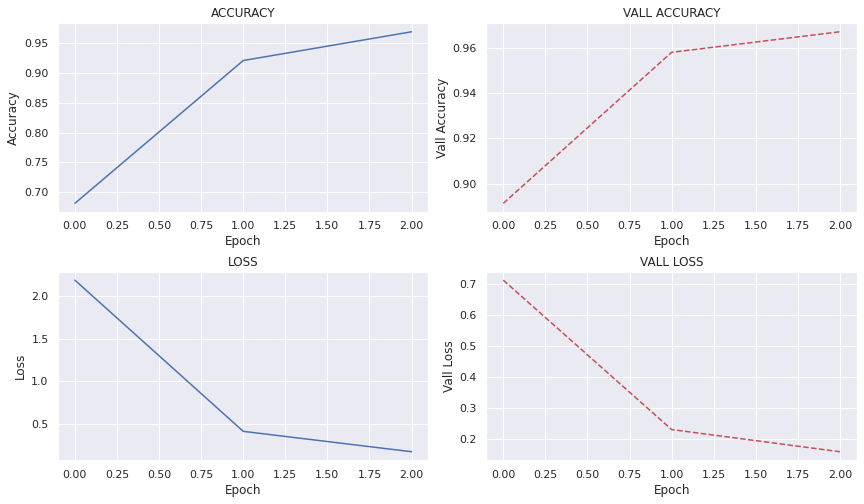

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,7))
ax1.plot(history.history["accuracy"])
ax1.set_title("ACCURACY")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epoch")

ax2.plot(history.history["val_accuracy"], "r--")
ax2.set_title("VALL ACCURACY")
ax2.set_ylabel("Vall Accuracy")
ax2.set_xlabel("Epoch");

ax3.plot(history.history["loss"])
ax3.set_title("LOSS")
ax3.set_ylabel("Loss")
ax3.set_xlabel("Epoch")

ax4.plot(history.history["val_loss"], "r--")
ax4.set_title("VALL LOSS")
ax4.set_ylabel("Vall Loss")
ax4.set_xlabel("Epoch");
fig.tight_layout(pad=0.6)